**CLUSTERING PLAYERSS BASED ON PLAYER'S REGULAR SEASON PERFOMANCE USING KMEANS ALGORITHM**

Nkosinathi Zamisa

**IMPORTING ALL THE REQIRED LIBRARIES**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import io
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, recall_score, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA
from sklearn.naive_bayes import CategoricalNB, MultinomialNB

**LOADING THE DATASET INTO THE WORKSPACE**

In [ ]:
from google.colab import files
uploaded = files.upload()
players = pd.read_csv(io.StringIO(uploaded['player_regular_season_career.csv'].decode('utf-8')),sep=';')
players.head()

Saving player_regular_season_career.csv to player_regular_season_career.csv


,ilkid,firstname,lastname,leag,gp,minutes,pts,oreb,dreb,reb,asts,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
0,ABDELAL01,Alaa,Abdelnaby,N,256,3200,1465,283,563,846,85,71,69,247,484,1236,620,321,225,3,0
1,ABDULKA01,Kareem,Abdul-jabbar,N,1560,57446,38387,2975,9394,17440,5660,1160,3189,2527,4657,28307,15837,9304,6712,18,1
2,ABDULMA01,Mahmo,Abdul-rauf,N,586,15633,8553,219,868,1087,2079,487,46,963,1107,7943,3514,1161,1051,1339,474
3,ABDULTA01,Tariq,Abdul-wahad,N,236,4808,1830,275,501,776,266,184,82,309,485,1726,720,529,372,76,18
4,ABDURSH01,Shareef,Abdur-rahim,N,672,24862,13338,1498,3976,5474,1847,718,556,1911,1845,10215,4789,4427,3614,477,146


In [ ]:
players.mean()

gp           248.194467
minutes     5819.112530
pts         2600.394520
oreb         229.751264
dreb         550.290237
reb         1130.256717
asts         580.475126
stl          152.833998
blk           92.721468
turnover     278.993615
pf           604.080074
fga         2222.528864
fgm         1003.826816
fta          726.555467
ftm          542.027401
tpa          149.888534
tpm           50.743283
dtype: float64

**ANALYZING THE DATASET COLUMNS CORRELATION**

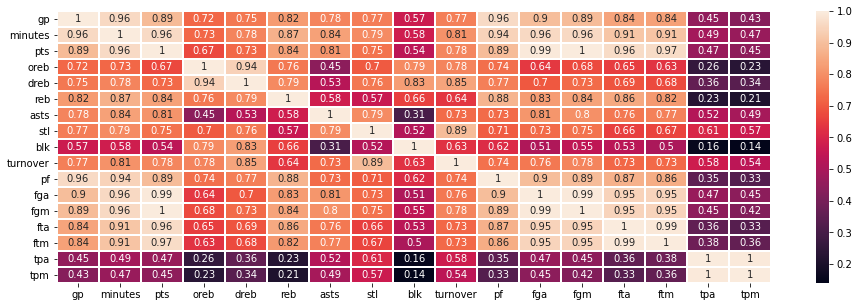

In [ ]:
plt.figure(figsize=(16,5))
correlation = players[["gp",	"minutes",	"pts",	"oreb",	"dreb",	"reb",	"asts",	"stl",	"blk",	"turnover",	"pf",	"fga",	"fgm",	"fta",	"ftm",	"tpa",	"tpm"]].corr()
sns.heatmap(correlation,annot=True,linewidths=1)

**IMPLEMENTING KMEANS MODEL OF THREE CLUSTERS**

In [ ]:
kmeansPlayerModel = KMeans(n_clusters=3,random_state=1)
numeric_columns = players._get_numeric_data()
kmeansPlayerModel.fit(numeric_columns)
player_labels = kmeansPlayerModel.labels_
print(player_labels)

[1 2 0 ... 1 1 1]


**USING PCA FOR DIMENSION REDUCTION ON OUR THREE CLUSTERS AND PLOT THEM FOR VISUALIZATION**

In [ ]:
two_dimension_pca = PCA(2)
transformed = two_dimension_pca.fit_transform(numeric_columns)

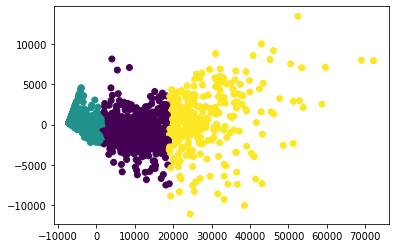

In [ ]:
plt.scatter(x=transformed[:,0],y=transformed[:,1],c=player_labels)

In [ ]:
James = numeric_columns.loc[players['firstname']=="LeBron"]
rice = numeric_columns.loc[players['lastname']=="Rice"]

In [ ]:
print(James)
print(rice)

       gp  minutes   pts  oreb  dreb   reb  ...   fga   fgm   fta  ftm  tpa  tpm
1595  159     6510  3829   210   810  1020  ...  3176  1417  1096  824  525  171

[1 rows x 17 columns]
        gp  minutes    pts  oreb  dreb  ...   fgm   fta   ftm   tpa   tpm
2764  1000    34985  18336   946  3441  ...  6776  3813  3225  3896  1559

[1 rows x 17 columns]


In [ ]:
james_pred = kmeansPlayerModel.predict(James)
rice_pred = kmeansPlayerModel.predict(rice)
print(james_pred)
print(rice_pred)

[1]
[2]


**SEPARATING CLUSTERS FOR ANALYSIS**

In [ ]:
cluster_1 = []
cluster_2 = []
cluster_3 = []
for i in range(len(player_labels)):
  if player_labels[i] ==0:
    cluster_1.append(player_labels[i])
  elif player_labels[i] ==1:
    cluster_2.append(player_labels[i])
  else:
    cluster_3.append(player_labels[i])

In [ ]:
print(len(cluster_1))
print(len(cluster_2))
print(len(cluster_3))

714
2753
292


In [ ]:
j = 0
for i in players.iterrows():
  print(i)
  if j==10:
    break
  j+=1

In [ ]:
players['Class'] = player_labels

In [ ]:
Class_3 = players.loc[players['Class']==2]
Class_2 = players.loc[players['Class']==1]
Class_1 = players.loc[players['Class']==0]

**GRAPH VISUALIZATION OF THE CLUSTERS**

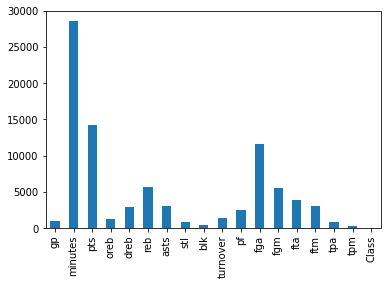

In [ ]:
Class_3.mean().plot(kind='bar')

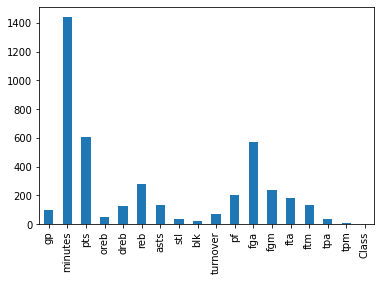

In [ ]:
Class_2.mean().plot(kind='bar')

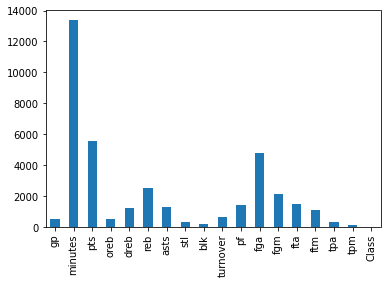

In [ ]:
Class_1.mean().plot(kind='bar')

In [ ]:
players.head()

,ilkid,firstname,lastname,leag,gp,minutes,pts,oreb,dreb,reb,asts,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm,Class
0,ABDELAL01,Alaa,Abdelnaby,N,256,3200,1465,283,563,846,85,71,69,247,484,1236,620,321,225,3,0,1
1,ABDULKA01,Kareem,Abdul-jabbar,N,1560,57446,38387,2975,9394,17440,5660,1160,3189,2527,4657,28307,15837,9304,6712,18,1,2
2,ABDULMA01,Mahmo,Abdul-rauf,N,586,15633,8553,219,868,1087,2079,487,46,963,1107,7943,3514,1161,1051,1339,474,0
3,ABDULTA01,Tariq,Abdul-wahad,N,236,4808,1830,275,501,776,266,184,82,309,485,1726,720,529,372,76,18,1
4,ABDURSH01,Shareef,Abdur-rahim,N,672,24862,13338,1498,3976,5474,1847,718,556,1911,1845,10215,4789,4427,3614,477,146,2


**SPLIT THE DATASET INTO TRAINING AND TESTING THEN CREATE CATEGORICAL NAIVE BAYES CLASSIFIER**

In [ ]:
x_train, x_test,y_train, y_test = train_test_split(numeric_columns,player_labels)

In [ ]:
x_test

,gp,minutes,pts,oreb,dreb,reb,asts,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
3631,75,1961,714,27,168,195,350,86,17,171,179,685,273,161,103,202,65
2162,12,71,30,3,7,10,7,5,0,2,10,23,8,16,12,6,2
3566,324,5410,2387,350,399,749,232,187,52,330,520,1919,971,652,444,13,1
2694,97,808,347,25,51,76,161,50,6,116,143,272,138,142,65,21,6
2286,3,0,7,0,0,0,0,0,0,0,7,13,3,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,4,106,44,5,14,19,3,3,5,12,14,41,18,17,8,0,0
1763,260,8514,4918,852,1630,2482,764,381,105,731,858,4041,2008,1161,879,68,23
3216,30,140,42,0,0,41,2,0,0,0,20,54,19,9,4,0,0
1200,179,3354,1499,137,296,433,352,186,32,216,389,1299,582,318,235,295,100


In [ ]:
player_model = CategoricalNB()

In [ ]:
player_model.fit(x_train,y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
predictions = player_model.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, predictions)

In [ ]:
cm

array([[ 463,   83,    0],
       [   0, 2068,    0],
       [   0,   34,  171]])

In [ ]:
player_model.score(x_test,y_test)

0.9563829787234043

In [ ]:
recall_score(y_test,predictions, average='weighted')

0.9563829787234043

In [ ]:
precision_score(y_test,predictions, average='weighted')

0.9588667257683215

In [ ]:
f1_score(y_test,predictions, average='weighted')

0.9551566223642023